<a href="https://colab.research.google.com/github/kukwasrohan/Email-Spam-Detection/blob/main/Email_Spam_Detecion_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -

$\color{red}{\text{Email Spam Detection }}$




# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

**Exploratory data analysis(EDA) :**

1.Firstly Checked correlation between Each Features in dataset.

2.Checking for Null values and missing values and removing that.

3.Checking the Description of dataset

4.checked the Stopwords in the dataset and removing the pancution.

5.checked thhe text and creating new function name as process text and get
the processed text

**Supervise Machine learning algorithms and implementation :**

1. Logistic regression

2. Random Forest Classifier

3. Support Vector Classifier







# **GitHub Link -**

https://github.com/kukwasrohan/Email-Spam-Detection/blob/main/Email_Spam_Detecion_.ipynb

# **Problem Statement**


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib
import warnings
warnings.filterwarnings('ignore')
# Ensure that plots are displayed inline
%matplotlib inline
import joblib

Using matplotlib backend: agg


In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix,classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from scipy.stats import zscore
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Spam Email Detection.xlsx')

### Dataset First View

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


### Dataset Rows & Columns count

In [ ]:
df.shape

(5572, 5)

### Dataset Information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


#### Duplicate Values

In [ ]:
df.duplicated().sum()

409

In [ ]:
print(f'we have duplicated {df.duplicated().sum()} in the dataset')

we have duplicated 409 in the dataset


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
print(f'we have duplicated {df.duplicated().sum()} in the dataset')

we have duplicated 0 in the dataset


#### Missing Values/Null Values

In [ ]:
df.isna().sum()

v1               0
v2               0
Unnamed: 2    5120
Unnamed: 3    5153
Unnamed: 4    5158
dtype: int64

So there are  null values

In [ ]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [ ]:
df.isna().sum()

v1    0
v2    0
dtype: int64

## ***2. Understanding Your Variables***

In [ ]:
df.columns

Index(['v1', 'v2'], dtype='object')

### Check Unique Values for each variable.

In [ ]:
varoables_df = df.columns.tolist()

In [ ]:
for i in varoables_df:
  print('The Unique Values of', i, 'are:', df[i].unique())

The Unique Values of v1 are: ['ham' 'spam']
The Unique Values of v2 are: ['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
 'Ok lar... Joking wif u oni...'
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"
 ... 'Pity, * was in mood for that. So...any other suggestions?'
 "The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free"
 'Rofl. Its true to its name']


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
 df.describe()

,v1,v2
count,5163,5163
unique,2,5163
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [ ]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['Length'] = df['v2'].str.len()

In [ ]:
df.head()

,v1,v2,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


In [ ]:
df.rename(columns={'v1':'Label','v2':'Text'},inplace = True)

In [ ]:
df.head()

,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


There is no outliers.

In [ ]:


# Calculate the Z-scores for the 'Length' column
df['Length_Zscore'] = zscore(df['Length'])

# Define a threshold for considering values as outliers (e.g., Z-score > 3 or < -3)
outlier_threshold = 3



In [ ]:
# Filter rows where Z-score is greater than the threshold
outliers = df[(df['Length_Zscore'] > outlier_threshold) | (df['Length_Zscore'] < -outlier_threshold)]

print("Outliers based on Z-score method:")
print(outliers[['Label', 'Text', 'Length']])



Outliers based on Z-score method:
Empty DataFrame
Columns: [Label, Text, Length]
Index: []


There are no outlier is found

In [ ]:

df.drop(columns=['Length_Zscore'], inplace=True)


In [ ]:
df.head()

,Label,Text,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111.0
1,ham,Ok lar... Joking wif u oni...,29.0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0
3,ham,U dun say so early hor... U c already then say...,49.0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1-Histogram of Text Lengths by Label

<Figure size 1000x600 with 0 Axes>

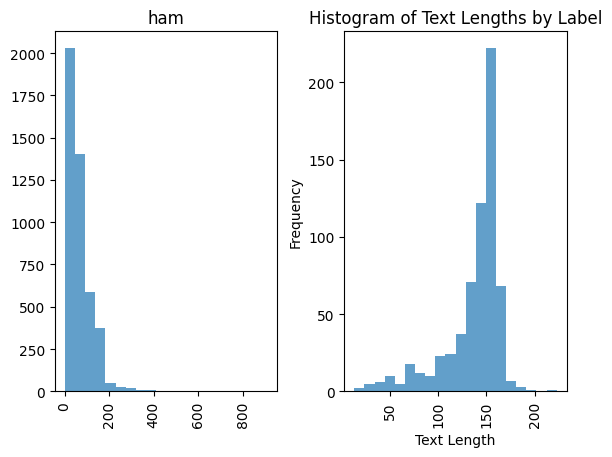

In [ ]:
# 1. Histogram of Text Lengths by Label
plt.figure(figsize=(10, 6))
df.hist(column='Length', by='Label', bins=20, alpha=0.7)
plt.title('Histogram of Text Lengths by Label')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()


#### Chart - 2- Boxplot of Text Lengths by Label


<Figure size 800x600 with 0 Axes>

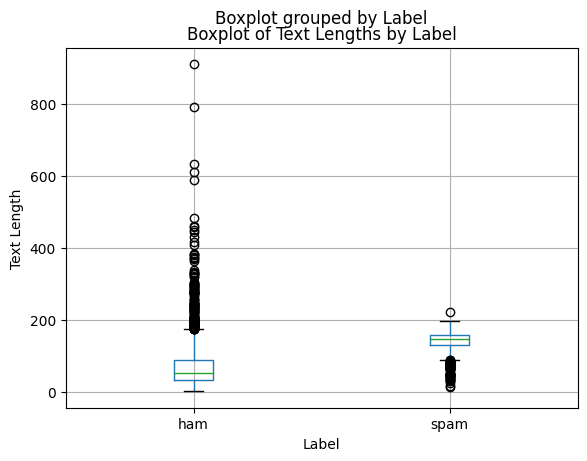

In [ ]:
plt.figure(figsize=(8, 6))
df.boxplot(column='Length', by='Label')
plt.title('Boxplot of Text Lengths by Label')
plt.xlabel('Label')
plt.ylabel('Text Length')
plt.show()


#### Chart - 3- Bar Chart of Label Frequencies


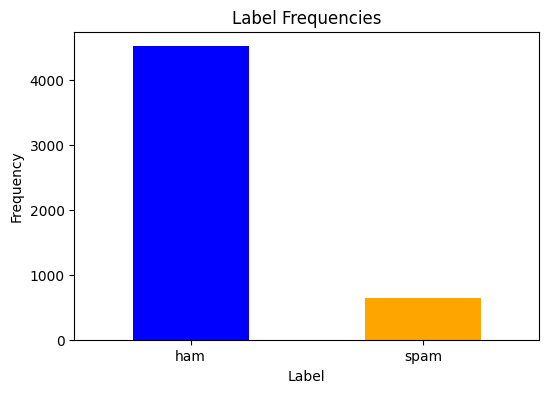

In [ ]:
# 3. Bar Chart of Label Frequencies
label_counts = df['Label'].value_counts()
plt.figure(figsize=(6, 4))
label_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Label Frequencies')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()


#### Chart - 4 -Pie Chart of Label Proportions


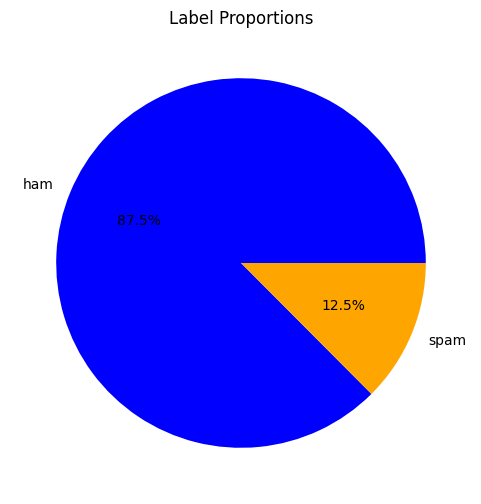

In [ ]:
# 4. Pie Chart of Label Proportions
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', colors=['blue', 'orange'])
plt.title('Label Proportions')
plt.show()

In [ ]:
df.columns

Index(['Label', 'Text', 'Length'], dtype='object')

In [ ]:
df['Text'] = df['Text'].astype(str)

#### Chart - 5- Word Cloud of Text Data (for ham messages)

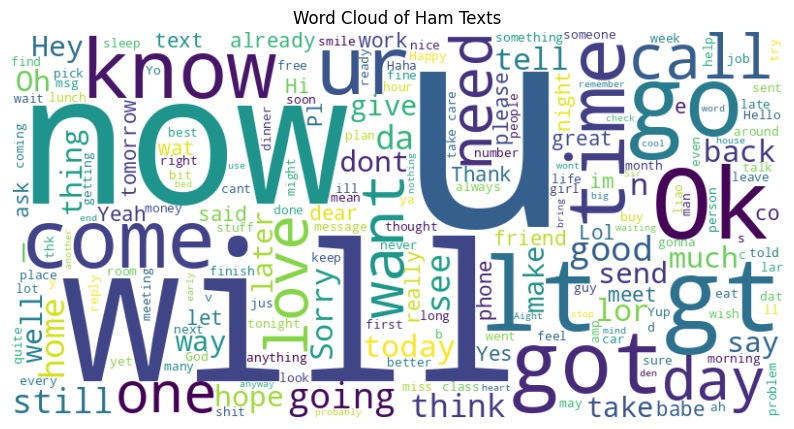

In [ ]:
ham_texts = ' '.join(df[df['Label'] == 'ham']['Text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_texts)
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Ham Texts')
plt.axis('off')
plt.show()

#### Chart - 6 - Correlation Heatmap

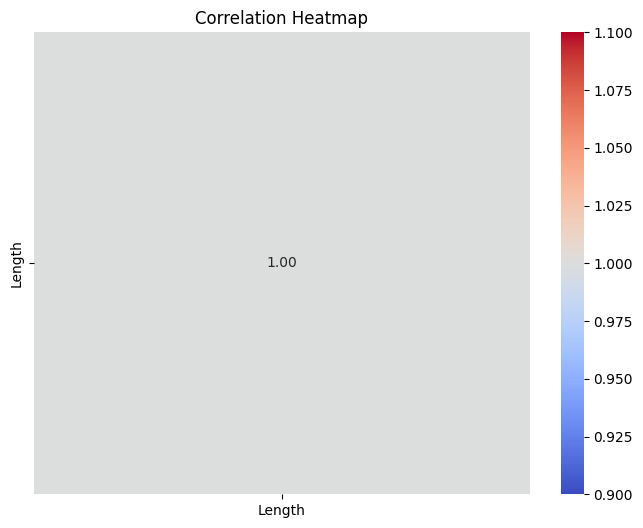

In [ ]:
correlation_matrix = df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


## ***5. Feature Engineering & Data Pre-processing***

### 3. Categorical Encoding

In [ ]:
df.columns

Index(['Label', 'Text', 'Length'], dtype='object')

In [ ]:
# function to remove punctuation and stopwords
def text_process(text):
    non_punc = [char for char in text if char not in string.punctuation]
    non_punc=''.join(non_punc)
    return [word for word in non_punc.split() if word not in stopwords.words('english')]

In [ ]:
print(df.columns)

Index(['Label', 'Text', 'Length'], dtype='object')


### 4. Feature Manipulation & Selection

In [ ]:
df['Process Text'] = df['Text'].apply(text_process)

#### 1. Feature Manipulation

In [ ]:
df.head()

,Label,Text,Length,Process Text
0,ham,"Go until jurong point, crazy.. Available only ...",111.0,"[Go, jurong, point, crazy, Available, bugis, n..."
1,ham,Ok lar... Joking wif u oni...,29.0,"[Ok, lar, Joking, wif, u, oni]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,"[Free, entry, 2, wkly, comp, win, FA, Cup, fin..."
3,ham,U dun say so early hor... U c already then say...,49.0,"[U, dun, say, early, hor, U, c, already, say]"
4,ham,"Nah I don't think he goes to usf, he lives aro...",61.0,"[Nah, I, dont, think, goes, usf, lives, around..."


### **Train Test Split**

In [ ]:
X = df['Text']
Y = df['Label']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.33,random_state= 42)

## ***6. ML Model Implementation***

### ML Model - 1

**Logistic Regression Model**

In [ ]:
pipe_mnb = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])


In [ ]:
# Fit the data into pipelines
pipe_mnb.fit(X_train, Y_train)


Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7d41a4deeef0>)),
                ('tf', TfidfTransformer()), ('classifier', MultinomialNB())])

In [ ]:
pipe_mnb.predict(X_test)


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [ ]:
y_pred = pipe_mnb.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred) * 100
print(f'The accuracy for Multinomial Classifier: {accuracy:.2f}%')

The accuracy for Multinomial Classifier: 95.83%


### ML Model - 2

**Random Forest Classifier Model**

In [ ]:
# Pipeline for Random Forest Classifier
pipe_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tf', TfidfTransformer()),
    ('classifier', RandomForestClassifier())
])


In [ ]:
pipe_rf.fit(X_train,Y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7d41a4deeef0>)),
                ('tf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

In [ ]:
pipe_rf.predict(X_test)


array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [ ]:
y_pred = pipe_rf.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred) * 100
print(f'The accuracy for Multinomial Classifier: {accuracy:.2f}%')

The accuracy for Multinomial Classifier: 97.42%


### ML Model - 3

**Support Vector Classifier**

In [ ]:
pipe_svc = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),
    ('tf', TfidfTransformer()),
    ('classifier', SVC())
])


In [ ]:
pipe_svc.fit(X_train,Y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7d41a4deeef0>)),
                ('tf', TfidfTransformer()), ('classifier', SVC())])

In [ ]:
y_pred = pipe_svc.predict(X_test)

In [ ]:
accuracy = accuracy_score(Y_test, y_pred) * 100
print(f'The accuracy for Multinomial Classifier: {accuracy:.2f}%')

The accuracy for Multinomial Classifier: 97.48%


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(type(pipe_svc))

<class 'sklearn.pipeline.Pipeline'>


In [ ]:
y_pred = pipe_svc.predict(X_test)

**The SVC predicts better tham Random Forest Model and Multinomial.**



In [ ]:
print ('Classification report on SVC:')
print('\n')
print(classification_report(Y_test, y_pred))

Classification report on SVC:


              precision    recall  f1-score   support

         ham       0.97      1.00      0.99      1511
        spam       1.00      0.78      0.87       193

    accuracy                           0.97      1704
   macro avg       0.99      0.89      0.93      1704
weighted avg       0.98      0.97      0.97      1704



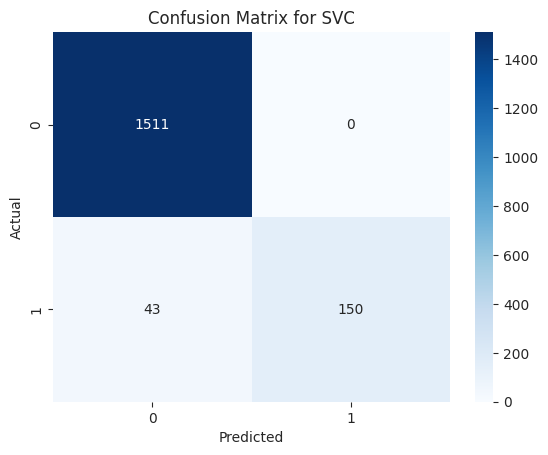

In [ ]:

conf_mat = confusion_matrix(Y_test, pipe_svc.predict(X_test))

sns.set_style('ticks')
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d')
plt.title("Confusion Matrix for SVC")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:

vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['linear', 'rbf', 'poly']
}


In [ ]:

svc = SVC()
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy')



In [ ]:
grid_search.fit(X_train_tfidf, Y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy')

In [ ]:

# Print the best parameters
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [ ]:
pipe_svc.named_steps['classifier'].get_params()


{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:

y_pred = grid_search.predict(X_test_tfidf)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)

# Display classification report and confusion matrix
print("\nClassification Report:\n", classification_report(Y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(Y_test, y_pred))


Accuracy: 0.9835680751173709

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      1.00      0.99      1511
        spam       0.97      0.89      0.92       193

    accuracy                           0.98      1704
   macro avg       0.98      0.94      0.96      1704
weighted avg       0.98      0.98      0.98      1704


Confusion Matrix:
 [[1505    6]
 [  22  171]]


In [ ]:


joblib.dump(pipe_svc, 'pipe_spam_model.pkl')


['pipe_spam_model.pkl']

# **Conclusion**

In this project, I started by cleaning and preparing my data. I removed unnecessary punctuation and common words from the text. Then, I made sure that the text data was in the right format for analysis.

Next, I explored the data visually to get a better understanding of it. I created a pie chart to show the proportions of different labels in my dataset. Then, I used a bar chart to display how often each label appeared.

I also looked at the length of the text messages. By making boxplots and histograms, I could see the distribution of text lengths for each label. This helped me understand if there were any patterns related to text length.

I did some feature engineering by calculating Z-scores for text lengths. This helped me identify any outliers—data points that were significantly different from the rest.

After preparing the data, I built machine learning models to classify the text messages. I tried different models like Multinomial Naive Bayes, Random Forest, and Support Vector Classifier (SVC). For each model, I used techniques like CountVectorizer and TfidfTransformer to convert the text data into a format that the models could understand.

Once the models were trained, I evaluated their performance using metrics like accuracy score, confusion matrix, and classification report. This helped me understand how well each model was performing and which one was the best.

I also used GridSearchCV to find the best parameters for my SVC model, which improved its performance even more.

Finally, I gained some additional insights by creating a word cloud to visualize the most common words in the 'ham' messages and by analyzing the correlation between variables in my dataset.

Overall, this project involved cleaning and preparing data, exploring it visually, engineering features, building machine learning models, evaluating their performance, and gaining insights from the results. It was a comprehensive analysis that helped me understand the text messages better and build accurate classification models.







